 1. Import libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score




2. Load dataset

In [3]:
df = pd.read_csv("Reviews.csv")

3. Basic inspection

In [4]:
print("Shape:", df.shape)
print(df[['Score', 'Text']].head())

Shape: (568454, 10)
   Score                                               Text
0      5  I have bought several of the Vitality canned d...
1      1  Product arrived labeled as Jumbo Salted Peanut...
2      4  This is a confection that has been around a fe...
3      2  If you are looking for the secret ingredient i...
4      5  Great taffy at a great price.  There was a wid...


4. Label encoding: Positive (4, 5) = 1; Negative (1, 2) = 0

In [5]:
df = df[df['Score'] != 3]  # Remove neutral reviews
df['Sentiment'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)

5. Text preprocessing (basic)


In [6]:
df = df[['Text', 'Sentiment']].dropna()

6. Visualizations

[A]


countplot() is a visualization function in the Seaborn library used to show the count (frequency) of observations in each category of a categorical variable






What it does:




Counts the number of occurrences for each unique category in a column.

Displays it as a bar chart.

Useful for understanding class imbalance in classification tasks.

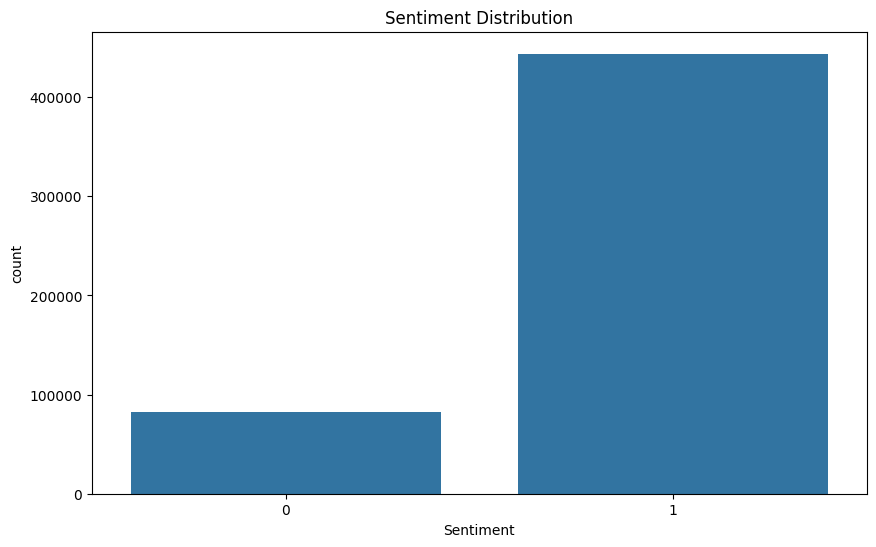

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment')
plt.title("Sentiment Distribution")
plt.show()

[B]

A histogram shows the distribution of a single numerical variable by dividing the data into intervals (bins) and counting how many values fall into each bin.




 Purpose:



To see how data is spread out (skewed, normal, uniform, etc.)

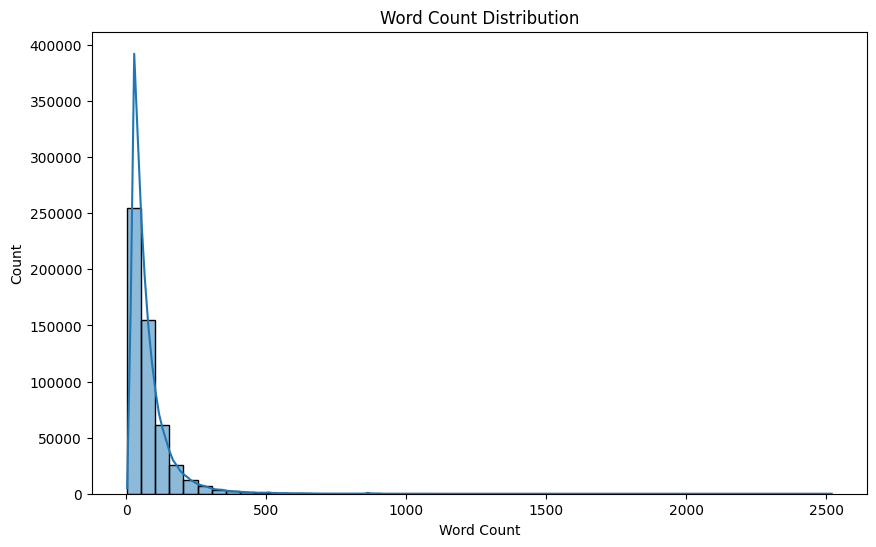

In [8]:
word_counts = df['Text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.histplot(word_counts, bins=50, kde=True)
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.show()


[C]


Definition:





A boxplot shows the distribution, central value (median), and variability (IQR) of a numerical feature — along with possible outliers.






 Components:





Box: from Q1 to Q3 (interquartile range).

Line inside box: median (Q2).

Whiskers: minimum and maximum (excluding outliers).






Dots: outliers

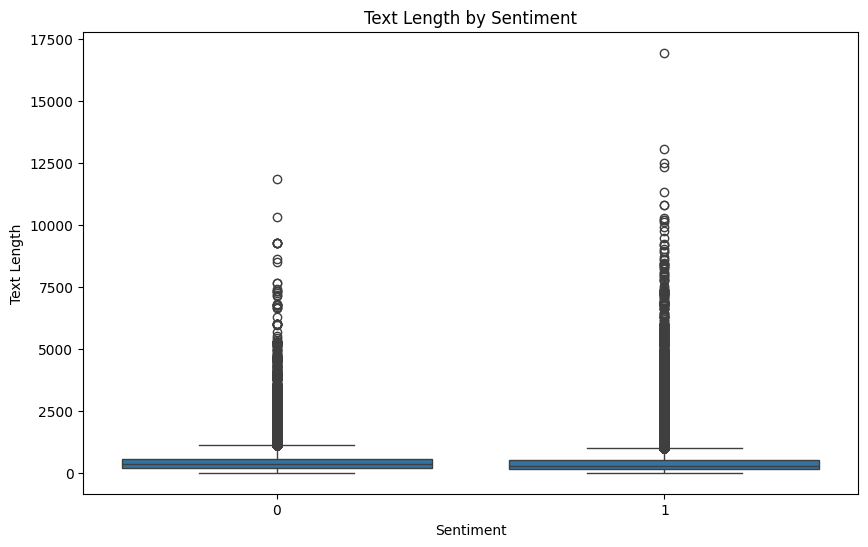

In [9]:
review_lengths = df['Text'].str.len()
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sentiment'], y=review_lengths)
plt.title("Text Length by Sentiment")
plt.ylabel("Text Length")
plt.xlabel("Sentiment")
plt.show()

[D]


Definition:




A violinplot is a combination of a boxplot and a kernel density plot (smoothed histogram). It shows both summary statistics and the distribution shape of the data.





 Purpose:




To compare distributions between multiple groups, with more detail than a boxplot.

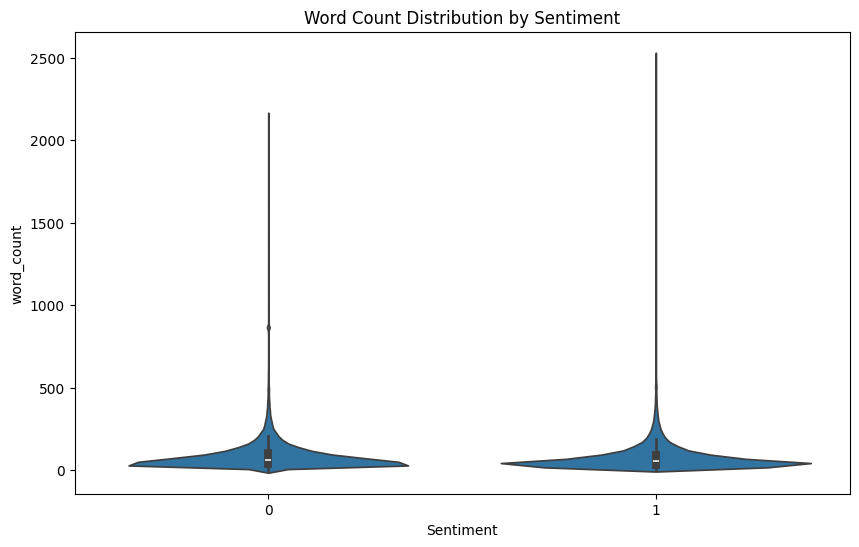

In [10]:
df['word_count'] = word_counts
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sentiment', y='word_count', data=df)
plt.title("Word Count Distribution by Sentiment")
plt.show()

7.  Text Vectorization


Text Vectorization is the process of converting text data (words, sentences, or documents) into numerical format (vectors) so that machine learning algorithms can understand and process it.










Why is it important?




Machine Learning models cannot handle raw text — they need numbers. Text vectorization helps transform human-readable language into a format that models can use for training and prediction.











In [11]:
X = df['Text']
y = df['Sentiment']
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(X)

8. Train-test split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


9. Define models

In [13]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": LinearSVC()
}

10. Train & Evaluate

In [ ]:
best_model = None
best_accuracy = 0
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    if accuracy > best_accuracy:
        best_model = model
        best_accuracy = accuracy


Training Logistic Regression...
Logistic Regression Accuracy: 0.9298
[[11091  5288]
 [ 2099 86685]]
              precision    recall  f1-score   support

           0       0.84      0.68      0.75     16379
           1       0.94      0.98      0.96     88784

    accuracy                           0.93    105163
   macro avg       0.89      0.83      0.85    105163
weighted avg       0.93      0.93      0.93    105163


Training Naive Bayes...
Naive Bayes Accuracy: 0.8827
[[ 4507 11872]
 [  467 88317]]
              precision    recall  f1-score   support

           0       0.91      0.28      0.42     16379
           1       0.88      0.99      0.93     88784

    accuracy                           0.88    105163
   macro avg       0.89      0.63      0.68    105163
weighted avg       0.89      0.88      0.85    105163


Training Random Forest...


In [ ]:
print("\n Predicting Sentiment for User Input")
while True:
    user_input = input("Enter a review (or type 'exit' to stop): ")
    if user_input.lower() == 'exit':
        print("Exiting prediction.")
        break
    input_transformed = tfidf.transform([user_input])
    prediction = best_model.predict(input_transformed)[0]
    sentiment = "Positive " if prediction == 1 else "Negative "
    print(f"Predicted Sentiment: {sentiment}\n")